In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#import json
#import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r=2
h=4

In [3]:
G = nx.balanced_tree(r,h, create_using=nx.MultiDiGraph)
nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [4]:
G.nodes[0]

{'type': 'vanilla'}

In [5]:
G.edges[(0,1,0)]

{'type': 'vanilla'}

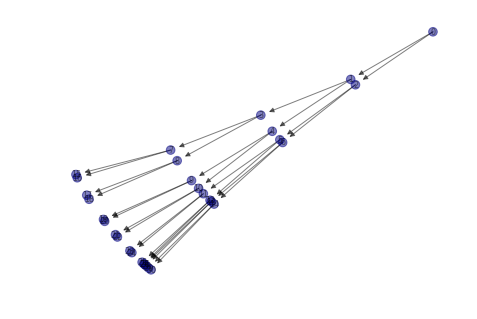

In [6]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [7]:
alpha = .01
iterations = 50

#seed = {n:1/len(G.nodes) for n in G.nodes}
seed = {n:0 for n in G.nodes}
seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,1/2)}

self_loop_wt= 1

In [8]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=False,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

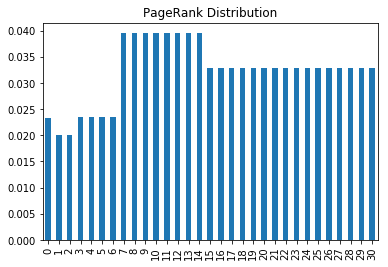

In [9]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

In [10]:
vals = np.zeros(5)
vals2 = np.zeros(5)
for n in G.nodes:
    ind = int(np.ceil(np.log2(2+int(n))))-1
    print(ind)
    vals[ind] = vals[ind] + G.nodes[n]['score']
    vals2[ind] = G.nodes[n]['score'] 

0
1
1
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


0.9999999999999978


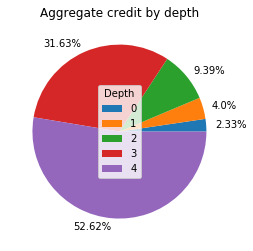

In [11]:
print(sum(vals))
plt.pie(vals, labels = [str(int(v*10000)/100)+'%' for v in vals])
plt.title('Aggregate credit by depth')
plt.legend(range(5), loc='center',title='Depth')

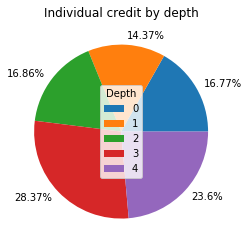

In [12]:
vals3 = vals2/np.sum(vals2)
plt.pie(vals3, labels = [str(int(v*10000)/100)+'%' for v in vals3])
plt.title('Individual credit by depth')
plt.legend(range(5), loc='center', title='Depth')

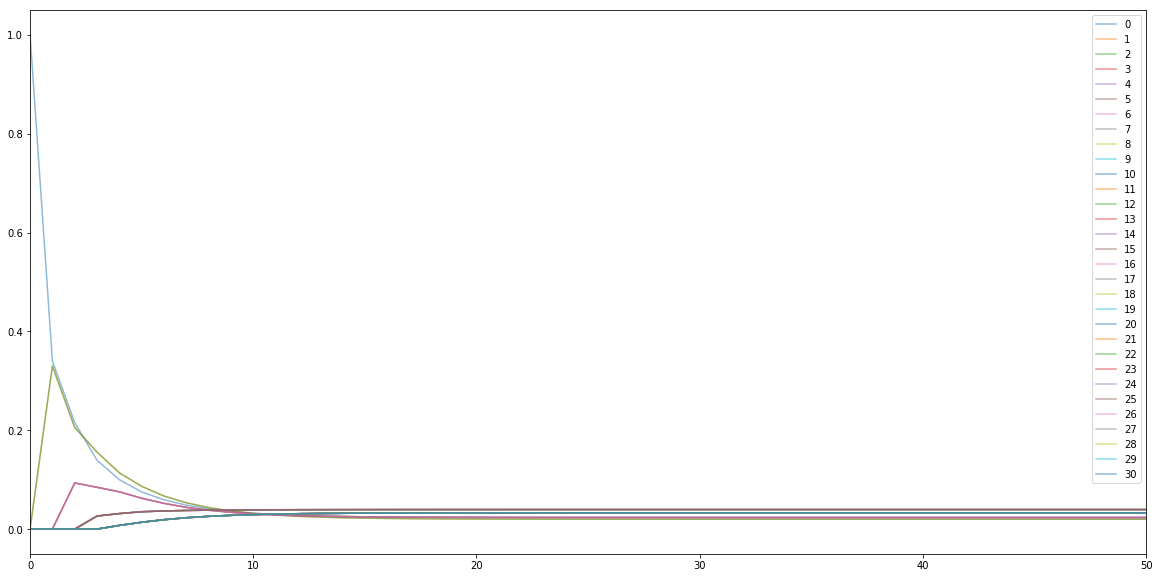

In [13]:
df.plot( figsize=(20,10), alpha=.5)

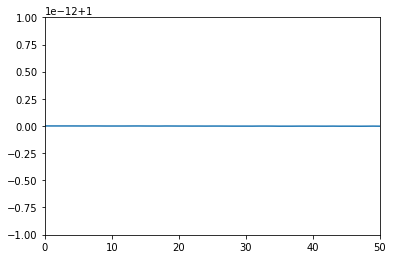

In [14]:
df.sum(axis=1).plot()

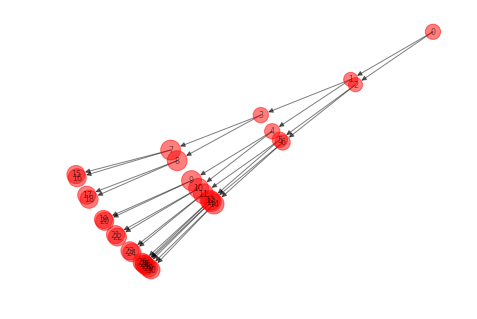

In [15]:
ns = [10000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8, alpha=.5)

In [16]:
nx.get_node_attributes(G,'self_wt')

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1}

In [17]:
nx.get_edge_attributes(G,'out_weight')

{(0, 1, 0): 0.5,
 (0, 2, 0): 0.5,
 (1, 3, 0): 0.5,
 (1, 4, 0): 0.5,
 (2, 5, 0): 0.5,
 (2, 6, 0): 0.5,
 (3, 7, 0): 0.5,
 (3, 8, 0): 0.5,
 (4, 9, 0): 0.5,
 (4, 10, 0): 0.5,
 (5, 11, 0): 0.5,
 (5, 12, 0): 0.5,
 (6, 13, 0): 0.5,
 (6, 14, 0): 0.5,
 (7, 15, 0): 0.5,
 (7, 16, 0): 0.5,
 (8, 17, 0): 0.5,
 (8, 18, 0): 0.5,
 (9, 19, 0): 0.5,
 (9, 20, 0): 0.5,
 (10, 21, 0): 0.5,
 (10, 22, 0): 0.5,
 (11, 23, 0): 0.5,
 (11, 24, 0): 0.5,
 (12, 25, 0): 0.5,
 (12, 26, 0): 0.5,
 (13, 27, 0): 0.5,
 (13, 28, 0): 0.5,
 (14, 29, 0): 0.5,
 (14, 30, 0): 0.5}

In [18]:
nx.get_edge_attributes(G,'in_weight')

{(0, 1, 0): 1,
 (0, 2, 0): 1,
 (1, 3, 0): 1,
 (1, 4, 0): 1,
 (2, 5, 0): 1,
 (2, 6, 0): 1,
 (3, 7, 0): 1,
 (3, 8, 0): 1,
 (4, 9, 0): 1,
 (4, 10, 0): 1,
 (5, 11, 0): 1,
 (5, 12, 0): 1,
 (6, 13, 0): 1,
 (6, 14, 0): 1,
 (7, 15, 0): 1,
 (7, 16, 0): 1,
 (8, 17, 0): 1,
 (8, 18, 0): 1,
 (9, 19, 0): 1,
 (9, 20, 0): 1,
 (10, 21, 0): 1,
 (10, 22, 0): 1,
 (11, 23, 0): 1,
 (11, 24, 0): 1,
 (12, 25, 0): 1,
 (12, 26, 0): 1,
 (13, 27, 0): 1,
 (13, 28, 0): 1,
 (14, 29, 0): 1,
 (14, 30, 0): 1}

In [19]:
nx.get_node_attributes(G,'total_wt')

{0: 3,
 1: 3.5,
 2: 3.5,
 3: 3.5,
 4: 3.5,
 5: 3.5,
 6: 3.5,
 7: 3.5,
 8: 3.5,
 9: 3.5,
 10: 3.5,
 11: 3.5,
 12: 3.5,
 13: 3.5,
 14: 3.5,
 15: 1.5,
 16: 1.5,
 17: 1.5,
 18: 1.5,
 19: 1.5,
 20: 1.5,
 21: 1.5,
 22: 1.5,
 23: 1.5,
 24: 1.5,
 25: 1.5,
 26: 1.5,
 27: 1.5,
 28: 1.5,
 29: 1.5,
 30: 1.5}

In [24]:
upwts = [.8,.6,.4,.2,.1]
alpha=.01
N = len(G.nodes)
R= np.zeros((len(upwts),N))
i=0
for upwt in upwts:
    edge_wt_by_type = {'vanilla': (1,upwt)}
    r, __, g = pr.pageRanker(G,
                             alpha,
                             iterations,
                             seed=seed,
                             initial_value = seed,
                             lazy=True,
                             lazy_decay = True,
                             self_loop_wt=self_loop_wt, 
                             node_wt_by_type =node_wt_by_type,
                             edge_wt_by_type=edge_wt_by_type)

    R[i,:] = r
    i=i+1


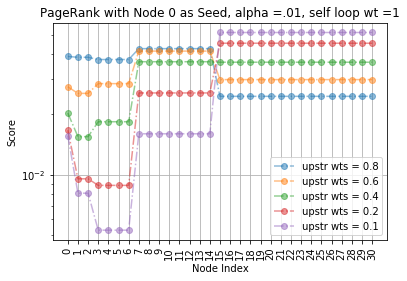

In [26]:
x= [n for n in range(N)]
plt.semilogy(x,R.T, '-.o',alpha=.5)
plt.legend(['upstr wts = '+str(s) for s in upwts],loc='lower right',ncol=1)
plt.title('PageRank with Node 0 as Seed, alpha =.01, self loop wt =1')
plt.ylabel('Score')
plt.xlabel('Node Index')
plt.xticks(rotation = 90)
ax = plt.axes()
ax.set_xticks(x)
ax.grid()

In [29]:
alphas = [.1,.03,.01,.003,.001]

R= np.zeros((len(alphas),N))
i=0
for a in alphas:
    r, __, g = pr.pageRanker(G,
                             a,
                             iterations,
                             seed=seed,
                             initial_value = seed,
                             lazy=True,
                             lazy_decay = True,
                             self_loop_wt=self_loop_wt, 
                             node_wt_by_type =node_wt_by_type,
                             edge_wt_by_type=edge_wt_by_type)

    R[i,:] = r
    i=i+1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

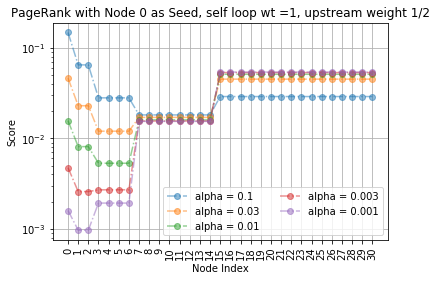

In [38]:
x= [n for n in range(N)]
plt.semilogy(x,R.T, '-.o', alpha=.5)
plt.legend(['alpha = '+str(a) for a in alphas],loc='lower right',ncol=2)
plt.title('PageRank with Node 0 as Seed, self loop wt =1, upstream weight 1/2')
plt.ylabel('Score')
plt.xlabel('Node Index')
ax = plt.axes()
ax.set_xticks(x)
ax.grid()
plt.xticks(rotation=90)